In [6]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import os

# Define paths and image dimensions
image_dir = '/Users/enejanhayytjanova/Desktop/My Githup/Deep-Learning-Projects/CNN_Project_Chlorophyll_measuring/train/cropped_images'  # Replace with your image directory path
chlorophyll_file = '/Users/enejanhayytjanova/Desktop/My Githup/Deep-Learning-Projects/CNN_Project_Chlorophyll_measuring/train/train_chlorophyll_level.txt'  # Replace with your chlorophyll values file path
img_height, img_width = 128, 128  # Replace with your target image size

# Load chlorophyll values from the text file
def load_chlorophyll_values(file_path):
    chlorophyll_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            img_name, value = line.strip().split()
            chlorophyll_dict[img_name] = float(value)
    return chlorophyll_dict

# Function to preprocess a single image
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Create a DataFrame from images and their chlorophyll values
def create_dataframe(image_dir, chlorophyll_file):
    chlorophyll_values = load_chlorophyll_values(chlorophyll_file)
    
    image_data = []
    values = []
    
    for img_filename, value in chlorophyll_values.items():
        img_path = os.path.join(image_dir, img_filename + '.jpg')  # Assuming images are in .jpg format
        if os.path.exists(img_path):
            img_array = preprocess_image(img_path)
            image_data.append(img_array)
            values.append(value)
        else:
            print(f"Warning: Image file {img_path} not found.")
    
    # Convert lists to numpy arrays
    X = np.array(image_data)
    y = np.array(values)
    
    # Create a DataFrame
    df_train = pd.DataFrame({
        'Image': list(X),  # Store image arrays as list entries
        'Chlorophyll': y
    })
    
    return df_train

# Example usage
df_train = create_dataframe(image_dir, chlorophyll_file)

# Display the DataFrame
df_train.head()


,Image,Chlorophyll
0,"[[[0.4, 0.5058824, 0.3372549], [0.45490196, 0....",447.2
1,"[[[0.36078432, 0.39607844, 0.28235295], [0.317...",394.2
2,"[[[0.37254903, 0.3254902, 0.2784314], [0.39215...",341.2
3,"[[[0.050980393, 0.03529412, 0.03137255], [0.04...",428.0
4,"[[[0.26666668, 0.22745098, 0.19215687], [0.298...",416.2


In [11]:
df_train.shape

(160, 2)

In [12]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import os

# Define paths and image dimensions
image_dir = '/Users/enejanhayytjanova/Desktop/My Githup/Deep-Learning-Projects/CNN_Project_Chlorophyll_measuring/test/cropped_images'  # Replace with your image directory path
chlorophyll_file = '/Users/enejanhayytjanova/Desktop/My Githup/Deep-Learning-Projects/CNN_Project_Chlorophyll_measuring/test/test_chlorophyll_level.txt'  # Replace with your chlorophyll values file path
img_height, img_width = 128, 128  # Replace with your target image size

# Load chlorophyll values from the text file
def load_chlorophyll_values(file_path):
    chlorophyll_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            img_name, value = line.strip().split()
            chlorophyll_dict[img_name] = float(value)
    return chlorophyll_dict

# Function to preprocess a single image
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Create a DataFrame from images and their chlorophyll values
def create_dataframe(image_dir, chlorophyll_file):
    chlorophyll_values = load_chlorophyll_values(chlorophyll_file)
    
    image_data = []
    values = []
    
    for img_filename, value in chlorophyll_values.items():
        img_path = os.path.join(image_dir, img_filename + '.jpg')  # Assuming images are in .jpg format
        if os.path.exists(img_path):
            img_array = preprocess_image(img_path)
            image_data.append(img_array)
            values.append(value)
        else:
            print(f"Warning: Image file {img_path} not found.")
    
    # Convert lists to numpy arrays
    X = np.array(image_data)
    y = np.array(values)
    
    # Create a DataFrame
    df_test = pd.DataFrame({
        'Image': list(X),  # Store image arrays as list entries
        'Chlorophyll': y
    })
    
    return df_test

# Example usage
df_test = create_dataframe(image_dir, chlorophyll_file)

# Display the DataFrame
df_test.head()


,Image,Chlorophyll
0,"[[[0.3764706, 0.43529412, 0.3137255], [0.45098...",381.0
1,"[[[0.54901963, 0.46666667, 0.3529412], [0.4745...",370.7
2,"[[[0.27058825, 0.23137255, 0.18431373], [0.231...",7.6
3,"[[[0.1764706, 0.21176471, 0.14509805], [0.1725...",178.9
4,"[[[0.5019608, 0.44313726, 0.28235295], [0.5450...",392.0


In [13]:
df_test.shape

(40, 2)

In [14]:
# Assuming df_train and df_test are already defined DataFrames
# Concatenate df_train and df_test along rows (axis=0)
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

# Display the concatenated DataFrame
df.head()

,Image,Chlorophyll
0,"[[[0.4, 0.5058824, 0.3372549], [0.45490196, 0....",447.2
1,"[[[0.36078432, 0.39607844, 0.28235295], [0.317...",394.2
2,"[[[0.37254903, 0.3254902, 0.2784314], [0.39215...",341.2
3,"[[[0.050980393, 0.03529412, 0.03137255], [0.04...",428.0
4,"[[[0.26666668, 0.22745098, 0.19215687], [0.298...",416.2


In [15]:
df.shape

(200, 2)

In [17]:
print(X_train.shape)  # Should be (num_samples, height, width, channels)
print(X_test.shape)
print(y_train.shape)  # Should be (num_samples,)
print(y_test.shape)
print(type(X_train), type(y_train))  # Ensure they are both NumPy arrays

(160,)
(40,)
(160,)
(40,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [33]:
# Assuming images are 64x64 with 3 channels (RGB)
X_train = np.stack(X_train)  # Stack to convert to (160, height, width, channels)
X_test = np.stack(X_test)

print(X_train.shape)  # Should now be (160, 64, 64, 3) if images are 64x64 with 3 channels
print(X_test.shape)

(160, 128, 128, 3)
(40, 128, 128, 3)


In [34]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [36]:
if len(y_train.shape) == 2 and y_train.shape[1] == 1:
    y_train = y_train.reshape(-1)
if len(y_test.shape) == 2 and y_test.shape[1] == 1:
    y_test = y_test.reshape(-1)

In [37]:
print(y_train.shape, y_test.shape)  # Should both be (num_samples,)
print(type(y_train), type(y_test))  # Should both be <class 'numpy.ndarray'>

(160,) (40,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [38]:
print(np.isnan(y_train).any())  # Should return False
print(np.isnan(y_test).any())   # Should return False

False
False


In [39]:
print(y_train[:5])  # Print the first 5 values of y_train to check correctness
print(X_train[:5])  # Check the first 5 images' pixel data (ensure they're numeric and correctly formatted)

[337.9 606.2 451.1 612.6 613.6]
[[[[4.89564158e-08 4.13882759e-08 3.21646034e-08]
   [4.84834075e-08 4.04422593e-08 3.14550910e-08]
   [4.09152676e-08 3.33471277e-08 2.36504434e-08]
   ...
   [4.77738951e-08 4.13882759e-08 3.12185868e-08]
   [4.68278785e-08 4.11517718e-08 3.07455785e-08]
   [4.61183660e-08 4.04422593e-08 3.00360625e-08]]

  [[4.89564158e-08 4.13882759e-08 3.21646034e-08]
   [4.75373909e-08 3.94962427e-08 3.05090744e-08]
   [4.11517718e-08 3.35836319e-08 2.43599558e-08]
   ...
   [4.58818619e-08 4.04422593e-08 3.00360625e-08]
   [4.42263257e-08 3.87867267e-08 2.83805317e-08]
   [4.30438050e-08 3.73677018e-08 2.69615050e-08]]

  [[4.84834075e-08 4.09152676e-08 3.12185868e-08]
   [4.56453577e-08 3.80772143e-08 2.88535418e-08]
   [3.94962427e-08 3.19280993e-08 2.29409309e-08]
   ...
   [4.13882759e-08 3.64216852e-08 2.57789843e-08]
   [3.90232309e-08 3.40566402e-08 2.34139392e-08]
   [3.61851811e-08 3.12185868e-08 2.10488942e-08]]

  ...

  [[3.99692510e-08 2.60154884e-08 

In [40]:
print(X_train.shape)  # Should be (160, 128, 128, 3)
print(X_test.shape)   # Should be (40, 128, 128, 3)

(160, 128, 128, 3)
(40, 128, 128, 3)


In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the 3D feature maps to 1D feature vector
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    
    # Output layer for regression (predicting a single value)
    Dense(1)
])

# Compile the model for regression (using Mean Squared Error loss)
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 193940.2656 - val_loss: 160979.7969
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 185131.6250 - val_loss: 145966.1562
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 167331.4531 - val_loss: 108282.7969
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 126420.7500 - val_loss: 51328.3125
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 52485.1328 - val_loss: 38893.8164
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 44363.5312 - val_loss: 59959.8750
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 50053.1094 - val_loss: 31479.2598
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 37638.4883 - val_loss: 32079.8691
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 41628.9062 - val_loss: 31660.7129
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 43248.3477 - val_loss: 31337.4727


In [43]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30972.6055
Test Loss (MSE): 31337.47265625


In [44]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [47]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 37825.6133 - val_loss: 36404.3828
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 39268.2578 - val_loss: 33528.9961
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 33204.2344 - val_loss: 30892.9336
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 36606.4883 - val_loss: 30643.1250
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 37765.8477 - val_loss: 31703.9688
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 38381.0781 - val_loss: 32809.4688
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 37681.8633 - val_loss: 31626.3223
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 36670.8086 - val_loss: 31347.3945
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 39012.9141 - val_loss: 31887.0352
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 37952.4805 - val_loss: 31814.5898


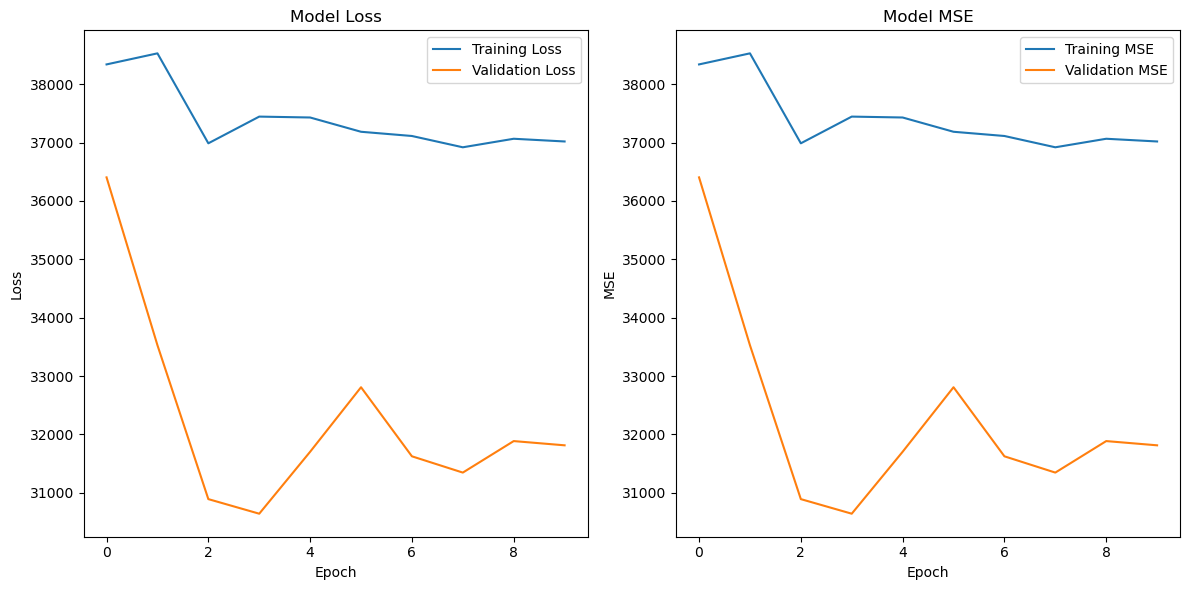

In [48]:
import matplotlib.pyplot as plt

# Extract history metrics
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Calculate MSE
mse = [loss_value for loss_value in loss]
val_mse = [val_loss_value for val_loss_value in val_loss]

# Plot training & validation MSE values
plt.subplot(1, 2, 2)
plt.plot(mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Model MSE')
plt.legend()

plt.tight_layout()
plt.show()


In [49]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2:.4f}')

R² Score: -0.0248
